In [1]:
%%bash
yes|pip2 uninstall captcha
yes|pip2 uninstall Pillow
pip2 install -U Pillow
pip2 install captcha

Uninstalling Pillow-2.3.0:
  /usr/lib/python2.7/dist-packages/PIL
  /usr/lib/python2.7/dist-packages/Pillow-2.3.0.egg-info
Proceed (y/n)?   Successfully uninstalled Pillow-2.3.0


Cannot uninstall requirement captcha, not installed
yes: standard output: Broken pipe
yes: write error
yes: standard output: Broken pipe
yes: write error


In [2]:
from io import BytesIO
from captcha.image import ImageCaptcha,WheezyCaptcha
from IPython.display import Image

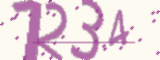

In [3]:
captcha = ImageCaptcha()
data = captcha.generate('1234')
captcha.write('1234', 'out.png')
Image("out.png")

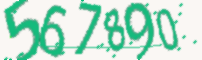

In [4]:
wheezy_captcha = WheezyCaptcha()
captcha.generate('567890')
captcha.write('567890', 'out.png')
Image("out.png")

In [5]:
%%bash
cat /etc/fonts/fonts.conf

<?xml version="1.0"?>
<!DOCTYPE fontconfig SYSTEM "fonts.dtd">
<!-- /etc/fonts/fonts.conf file to configure system font access -->
<fontconfig>

<!--
	DO NOT EDIT THIS FILE.
	IT WILL BE REPLACED WHEN FONTCONFIG IS UPDATED.
	LOCAL CHANGES BELONG IN 'local.conf'.

	The intent of this standard configuration file is to be adequate for
	most environments.  If you have a reasonably normal environment and
	have found problems with this configuration, they are probably
	things that others will also want fixed.  Please submit any
	problems to the fontconfig bugzilla system located at fontconfig.org

	Note that the normal 'make install' procedure for fontconfig is to
	replace any existing fonts.conf file with the new version.  Place
	any local customizations in local.conf which this file references.

	Keith Packard
-->

<!-- Font directory list -->

	<dir>/usr/share/fonts</dir>
	<dir>/usr/local/share/fonts</dir>
	<dir prefix="xdg">fonts</dir>
	<!-- the following element will be removed in the fu

In [6]:
%%bash
ls /usr/share/fonts/truetype/*

/usr/share/fonts/truetype/dejavu:
DejaVuSans-Bold.ttf
DejaVuSansMono-Bold.ttf
DejaVuSansMono.ttf
DejaVuSans.ttf
DejaVuSerif-Bold.ttf
DejaVuSerif.ttf

/usr/share/fonts/truetype/lyx:
cmex10.ttf
cmmi10.ttf
cmr10.ttf
cmsy10.ttf
esint10.ttf
eufm10.ttf
msam10.ttf
msbm10.ttf
rsfs10.ttf
wasy10.ttf


In [7]:
import glob

In [8]:
fonts = glob.glob('/usr/share/fonts/truetype/dejavu/*.ttf')

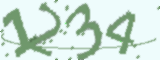

In [9]:
captcha = ImageCaptcha(fonts=fonts)
data = captcha.generate('1234')
captcha.write('1234', 'out.png')
Image("out.png")

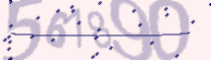

In [10]:
wheezy_captcha = WheezyCaptcha(fonts=fonts)
captcha.generate_image('567890')

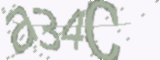

In [11]:
captcha = ImageCaptcha(fonts=fonts)
captcha.generate_image('a34c')

In [19]:
import numpy as np
import PIL

In [20]:
img = captcha.generate_image('9e3o')
arr = np.asarray(img, dtype="float32")/255.0

In [21]:
data = np.empty((1, 3, 60, 160), dtype="float32")
data[0, :, :, :] = np.rollaxis(arr, 2)

In [22]:
help(img.resize)

Help on method resize in module PIL.Image:

resize(self, size, resample=0) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:attr:`PIL.Image.NEAREST`, :py:attr:`PIL.Image.BOX`,
       :py:attr:`PIL.Image.BILINEAR`, :py:attr:`PIL.Image.HAMMING`,
       :py:attr:`PIL.Image.BICUBIC` or :py:attr:`PIL.Image.LANCZOS`.
       If omitted, or if the image has mode "1" or "P", it is
       set :py:attr:`PIL.Image.NEAREST`.
       See: :ref:`concept-filters`.
    :returns: An :py:class:`~PIL.Image.Image` object.



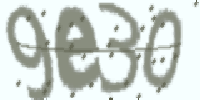

In [23]:
img.resize((200, 100))

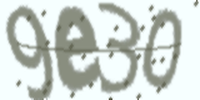

In [24]:
img.resize((200, 100), PIL.Image.LANCZOS)

The following code is adapted from https://github.com/skyduy/CNN_keras/blob/master/core/train_with_acc_2.py

In [25]:
from numpy import argmax, array
from sklearn.cross_validation import train_test_split
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Graph
from keras.utils import np_utils
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.


In [49]:
import math
import random
import IPython.display as display

'2694'

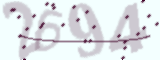

'0762'

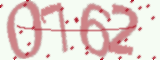

'6410'

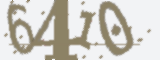

'8389'

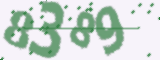

'1942'

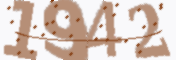

In [195]:
SAMPLE_SIZE = 1000
SHOW_SAMPLE_SIZE = 5
INVALID_DIGIT = -1
DIGIT_COUNT = 4
DIGIT_FORMAT_STR = "%%0%dd" % DIGIT_COUNT
# print DIGIT_FORMAT_STR
labels = []
images = []
for i in range(0, SAMPLE_SIZE):
    digits = 0
    last_digit = INVALID_DIGIT
    for j in range(0, DIGIT_COUNT):
        digit = last_digit
        while digit == last_digit:
            digit = random.randint(0, 9)
        last_digit = digit
        digits = digits * 10 + digit
    digits_as_str = DIGIT_FORMAT_STR % digits
    labels.append(digits_as_str)
    images.append(captcha.generate_image(digits_as_str))

for index in range(SHOW_SAMPLE_SIZE):
    display.display(labels[index])
    display.display(images[index])

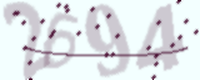

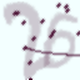

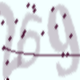

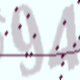

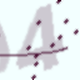

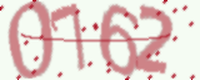

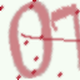

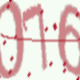

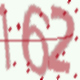

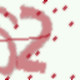

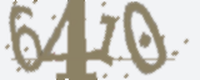

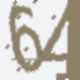

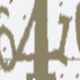

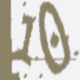

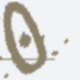

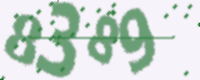

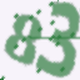

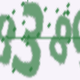

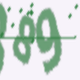

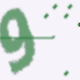

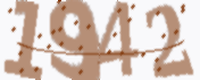

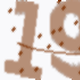

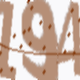

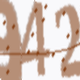

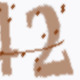

In [196]:
# standard width for the whole captcha image
IMAGE_STD_WIDTH = 200
# standard height for the whole captcha image
IMAGE_STD_HEIGHT = 80
# when spliting an image into digits, how much wider do we want, as an rate
EXTRA_RATE = 0.15
# how much wider do we want, as a width
EXTRA_WIDTH = int(math.floor(IMAGE_STD_WIDTH * EXTRA_RATE))
# the standard digit image width
DIGIT_IMAGE_STD_WIDTH_WITH_EXTRA = IMAGE_STD_WIDTH / DIGIT_COUNT + EXTRA_WIDTH

digit_labels = np.empty(SAMPLE_SIZE * DIGIT_COUNT)
digit_image_data = np.empty((SAMPLE_SIZE * DIGIT_COUNT, 3, IMAGE_STD_HEIGHT, DIGIT_IMAGE_STD_WIDTH_WITH_EXTRA), dtype="float32")

for index in range(0, SHOW_SAMPLE_SIZE):
    img = images[index].resize((IMAGE_STD_WIDTH, IMAGE_STD_HEIGHT), PIL.Image.LANCZOS)
    display.display(img)
    for digit_index in range(0, DIGIT_COUNT):
        #  (left, upper, right, lower)
        left = max(0, IMAGE_STD_WIDTH * (digit_index + 0.0) / DIGIT_COUNT - EXTRA_WIDTH)
        right = min(IMAGE_STD_WIDTH, IMAGE_STD_WIDTH * (digit_index + 1.0) / DIGIT_COUNT + EXTRA_WIDTH)
        crop_box = (left, 0, right, IMAGE_STD_HEIGHT)
        processed_img = img.crop(crop_box)
        processed_img = processed_img.resize((DIGIT_IMAGE_STD_WIDTH_WITH_EXTRA, IMAGE_STD_HEIGHT), PIL.Image.LANCZOS)
        display.display(processed_img)
        img_arr = np.asarray(processed_img, dtype="float32") / 255.0
        digit_image_data[index * DIGIT_COUNT + digit_index, :, :, :] = np.rollaxis(img_arr, 2)

Spliting images is dead end. Try not to.

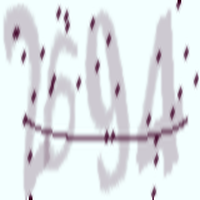

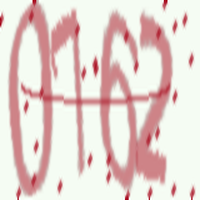

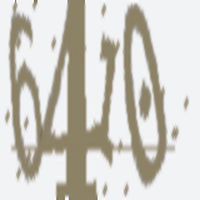

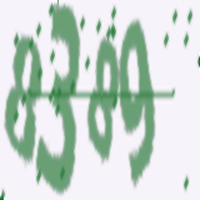

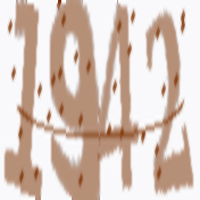

In [197]:
# standard width for the whole captcha image
IMAGE_STD_WIDTH = 200
# standard height for the whole captcha image
IMAGE_STD_HEIGHT = 200

digit_labels = list()

for digit_index in range(0, DIGIT_COUNT):
    digit_labels.append(np.empty(SAMPLE_SIZE, dtype="int8"))
    
digit_image_data = np.empty((SAMPLE_SIZE, 3, IMAGE_STD_HEIGHT, IMAGE_STD_WIDTH), dtype="float32")

for index in range(0, SAMPLE_SIZE):
    img = images[index].resize((IMAGE_STD_WIDTH, IMAGE_STD_HEIGHT), PIL.Image.LANCZOS)
    if index < SHOW_SAMPLE_SIZE:
        display.display(img)
    img_arr = np.asarray(img, dtype="float32") / 255.0
    digit_image_data[index, :, :, :] = np.rollaxis(img_arr, 2)
    for digit_index in range(0, DIGIT_COUNT):
        digit_labels[digit_index][index] = labels[index][digit_index]

In [199]:
digit_labels

[array([2, 0, 6, 8, 1, 0, 3, 3, 5, 1, 0, 0, 8, 2, 8, 2, 9, 6, 7, 4, 8, 2, 4,
        4, 2, 7, 2, 4, 0, 2, 0, 5, 5, 9, 0, 3, 3, 8, 4, 5, 3, 8, 8, 0, 0, 8,
        4, 2, 6, 0, 9, 9, 3, 9, 1, 1, 5, 3, 3, 5, 4, 6, 4, 1, 8, 2, 2, 5, 1,
        6, 7, 4, 5, 9, 1, 1, 3, 7, 0, 5, 0, 7, 1, 6, 5, 1, 0, 3, 6, 7, 2, 6,
        3, 6, 4, 6, 0, 8, 6, 1, 4, 5, 6, 5, 3, 0, 0, 7, 6, 5, 5, 5, 4, 2, 1,
        1, 3, 8, 3, 7, 6, 0, 0, 0, 0, 6, 6, 2, 0, 6, 4, 1, 8, 5, 0, 9, 2, 4,
        3, 9, 9, 6, 7, 6, 1, 3, 0, 8, 5, 7, 7, 5, 8, 1, 4, 2, 5, 6, 4, 8, 0,
        0, 9, 8, 9, 6, 0, 7, 2, 9, 6, 0, 6, 1, 3, 7, 4, 2, 7, 6, 7, 9, 7, 1,
        1, 4, 6, 7, 7, 0, 5, 2, 8, 3, 6, 1, 5, 7, 5, 1, 0, 6, 5, 2, 1, 0, 6,
        8, 5, 0, 1, 4, 9, 6, 2, 8, 5, 9, 3, 6, 1, 9, 9, 4, 9, 2, 8, 9, 8, 3,
        9, 3, 4, 7, 3, 3, 5, 9, 6, 1, 3, 2, 1, 0, 4, 8, 7, 9, 5, 2, 7, 1, 8,
        9, 8, 9, 8, 8, 6, 9, 6, 2, 6, 9, 1, 8, 5, 2, 7, 9, 0, 2, 9, 8, 5, 8,
        9, 6, 5, 9, 4, 6, 9, 6, 5, 1, 1, 7, 4, 9, 2, 8, 6, 6, 8, 8, 1, 9, 5,

In [200]:
digit_labels[0][0]

2

In [201]:
digit_image_data.size == SAMPLE_SIZE * 3 * IMAGE_STD_HEIGHT * IMAGE_STD_WIDTH

True

In [202]:
digit_image_data[0].shape

(3, 200, 200)

In [203]:
# goal is (80,200,3)
np.rollaxis(digit_image_data[0], 0, 3).shape

(200, 200, 3)

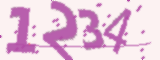

In [204]:
img = captcha.generate_image('1234')
data = np.asarray(img, dtype="float32") / 255.0
PIL.Image.fromarray(np.uint8(data * 255.0), 'RGB')

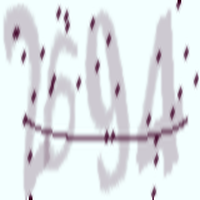

In [205]:
display.display(PIL.Image.fromarray(np.uint8(np.rollaxis(digit_image_data[0], 0, 3) * 255.0), 'RGB'))

In [206]:
X, Y_all = digit_image_data, digit_labels[0] 
X_train, X_test, y_train_num, y_test = train_test_split(X, Y_all, test_size=0.1, random_state=0)

In [207]:
print y_train_num

[1 9 2 0 2 4 9 3 7 2 8 1 8 8 9 6 0 9 7 2 6 6 0 3 4 0 7 6 6 0 7 8 6 7 2 7 8
 5 2 1 5 6 7 2 5 8 4 3 1 0 2 0 2 5 4 4 9 7 1 4 4 8 8 9 3 9 0 4 1 2 3 9 3 1
 0 9 3 1 0 1 3 1 0 5 0 5 4 2 0 1 1 4 1 0 4 8 0 8 8 7 1 3 5 3 8 3 4 9 2 5 2
 5 8 2 7 4 4 4 3 8 7 6 5 5 3 8 9 2 7 3 6 8 4 1 4 5 8 3 1 9 4 6 0 3 4 1 7 6
 4 9 9 5 1 6 1 4 5 4 9 4 1 7 3 9 1 3 8 6 2 8 1 1 9 9 8 6 6 7 0 6 5 0 8 0 9
 5 9 4 5 9 7 1 7 2 7 7 2 4 1 0 0 1 7 2 0 6 8 3 2 6 8 1 7 8 5 3 3 1 4 0 6 3
 9 3 6 3 6 3 9 1 7 1 8 5 3 6 0 1 2 4 8 3 3 8 6 9 2 4 3 0 2 3 7 7 5 8 1 7 5
 7 7 6 6 4 4 6 2 9 8 1 2 6 7 1 5 3 2 2 7 0 2 6 5 9 9 3 5 1 2 9 6 7 0 9 3 7
 8 8 2 9 6 5 8 5 8 9 3 5 9 2 2 6 2 9 1 4 0 6 6 7 5 8 0 8 2 7 2 2 9 2 3 6 2
 2 0 9 7 0 8 9 2 7 7 4 4 0 5 3 5 7 7 7 3 3 1 5 3 3 9 2 0 2 3 8 7 3 4 9 3 7
 0 4 3 0 9 9 5 6 9 2 8 9 6 4 5 5 1 3 2 7 4 5 5 5 0 0 5 0 2 3 1 4 1 5 6 7 4
 4 2 5 8 7 1 3 0 6 0 9 0 4 7 1 7 0 2 3 9 9 2 7 5 8 4 2 6 2 8 6 9 7 6 5 3 6
 8 6 2 8 5 0 9 8 0 3 7 3 6 8 1 2 1 6 9 3 4 3 2 7 1 5 0 9 4 8 9 6 9 2 0 4 3
 4 7 0 3 6 7 1 1 3 9 1 1 

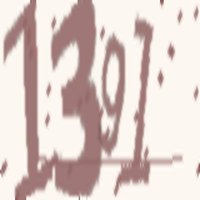

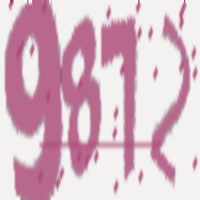

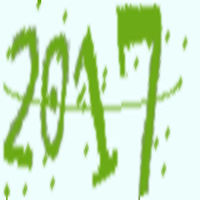

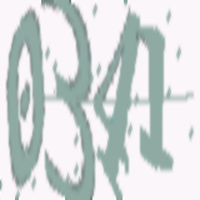

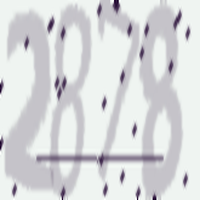

In [208]:
for img in X_train[0:SHOW_SAMPLE_SIZE]:
    display.display(PIL.Image.fromarray(np.uint8(np.rollaxis(img, 0, 3) * 255.0), 'RGB'))

In [209]:
CLASS_COUNT = 10

y_train = np_utils.to_categorical(y_train_num, CLASS_COUNT)
y_train

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [210]:
RGB_COLOR_COUNT = 3

POOL_SIZE = (2, 2)

CONV1_NB_FILTERS = IMAGE_STD_HEIGHT / 2 + 2
CONV2_NB_FILTERS = IMAGE_STD_HEIGHT + 2 * 2

graph = Graph()
# graph.add_input(name='input', input_shape=(3, 40, 40))
graph.add_input(name='input', input_shape=(RGB_COLOR_COUNT, IMAGE_STD_HEIGHT, IMAGE_STD_WIDTH))
# http://stackoverflow.com/questions/36243536/what-is-the-number-of-filter-in-cnn/36243662
graph.add_node(Convolution2D(22, 5, 5, activation='relu'), name='conv1', input='input')
graph.add_node(MaxPooling2D(pool_size=POOL_SIZE), name='pool1', input='conv1')
graph.add_node(Convolution2D(44, 3, 3, activation='relu'), name='conv2', input='pool1')
graph.add_node(MaxPooling2D(pool_size=POOL_SIZE), name='pool2', input='conv2')
graph.add_node(Dropout(0.25), name='drop', input='pool2')
graph.add_node(Flatten(), name='flatten', input='drop')
graph.add_node(Dense(256, activation='relu'), name='ip', input='flatten')
graph.add_node(Dropout(0.5), name='drop_out', input='ip')
graph.add_node(Dense(CLASS_COUNT, activation='softmax'), name='result', input='drop_out')
graph.add_output(name='out', input='result')

In [211]:
graph.compile(
    optimizer='adadelta',
    loss={
        'out': 'categorical_crossentropy',
    }
)

In [212]:
class ValidateAcc(Callback):
    def on_epoch_end(self, epoch, logs={}):
        print '\n————————————————————————————————————'
        graph.load_weights('tmp/weights.%02d.hdf5' % epoch)
        r = graph.predict({'input': X_test}, verbose=0)
        y_predict = array([argmax(i) for i in r['out']])
        length = len(y_predict) * 1.0
        acc = sum(y_predict == y_test) / length
        print 'Single picture test accuracy: %2.2f%%' % (acc * 100)
        print 'Theoretical accuracy: %2.2f%% ~  %2.2f%%' % ((5*acc-4)*100, pow(acc, 5)*100)
        print '————————————————————————————————————'

In [213]:
%%bash
rm -rf tmp
rm -rf model
mkdir tmp
mkdir model

In [214]:
check_point = ModelCheckpoint(filepath="tmp/weights.{epoch:02d}.hdf5")
back = ValidateAcc()
print 'Begin train on %d samples... test on %d samples...' % (len(y_train), len(y_test))
graph.fit(
    {'input': X_train, 'out': y_train},
    batch_size=128, nb_epoch=3, callbacks=[check_point, back]
)
print '... saving'
graph.save_weights('model/model_2.hdf5')

Begin train on 900 samples... test on 100 samples...
Epoch 1/3
896/900 [============================>.] - ETA: 0s - loss: 4.8050 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 121s - loss: 4.7945   
Epoch 2/3
896/900 [============================>.] - ETA: 0s - loss: 2.3151 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 105s - loss: 2.3150   
Epoch 3/3
896/900 [============================>.] - ETA: 0s - loss: 2.3067 
————————————————————————————————————
Single picture test accuracy: 14.00%
Theoretical accuracy: -330.00% ~  0.01%
————————————————————————————————————
900/900 [==============================] - 109s - loss: 2.3067   
... saving


In [217]:
check_point = ModelCheckpoint(filepath="tmp/weights.{epoch:02d}.hdf5")
back = ValidateAcc()
print 'Begin train on %d samples... test on %d samples...' % (len(y_train), len(y_test))
graph.load_weights('model/model_2.hdf5')
graph.fit(
    {'input': X_train, 'out': y_train},
    batch_size=128, nb_epoch=5, callbacks=[check_point, back]
)
print '... saving'
graph.save_weights('model/model_2.hdf5', overwrite=True)

Begin train on 900 samples... test on 100 samples...
Epoch 1/5
896/900 [============================>.] - ETA: 0s - loss: 2.3025 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 87s - loss: 2.3025    
Epoch 2/5
896/900 [============================>.] - ETA: 0s - loss: 2.3025 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 84s - loss: 2.3025    
Epoch 3/5
896/900 [============================>.] - ETA: 0s - loss: 2.3025 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 89s - loss: 2.3025    
Epoch 4/5
896/900 [============================>.] - ETA: 0s - loss:

In [219]:
check_point = ModelCheckpoint(filepath="tmp/weights.{epoch:02d}.hdf5")
back = ValidateAcc()
print 'Begin train on %d samples... test on %d samples...' % (len(y_train), len(y_test))
graph.load_weights('model/model_2.hdf5')
graph.fit(
    {'input': X_train, 'out': y_train},
    batch_size=128, nb_epoch=10, callbacks=[check_point, back]
)
print '... saving'
graph.save_weights('model/model_2.hdf5', overwrite=True)

Begin train on 900 samples... test on 100 samples...
Epoch 1/10
896/900 [============================>.] - ETA: 0s - loss: 2.3025 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 87s - loss: 2.3025    
Epoch 2/10
896/900 [============================>.] - ETA: 0s - loss: 2.3025 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 93s - loss: 2.3025    
Epoch 3/10
896/900 [============================>.] - ETA: 0s - loss: 2.3025 
————————————————————————————————————
Single picture test accuracy: 8.00%
Theoretical accuracy: -360.00% ~  0.00%
————————————————————————————————————
900/900 [==============================] - 94s - loss: 2.3024    
Epoch 4/10
896/900 [============================>.] - ETA: 0s - l